# Seaborn

## Distribution Plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


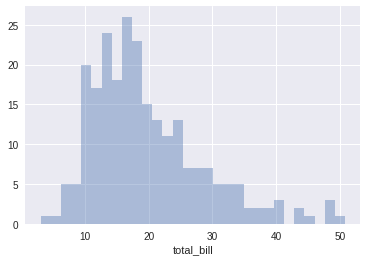

In [5]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

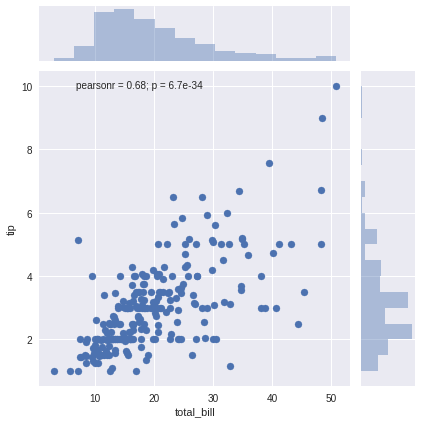

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips, )

/home/casper/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


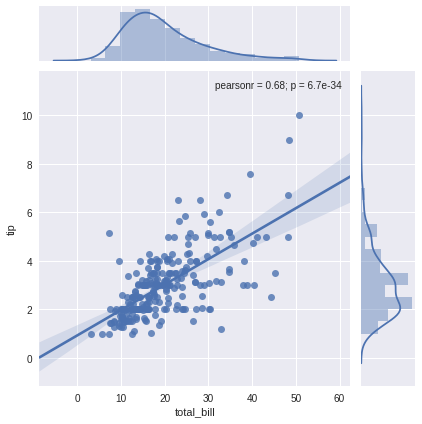

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg' )

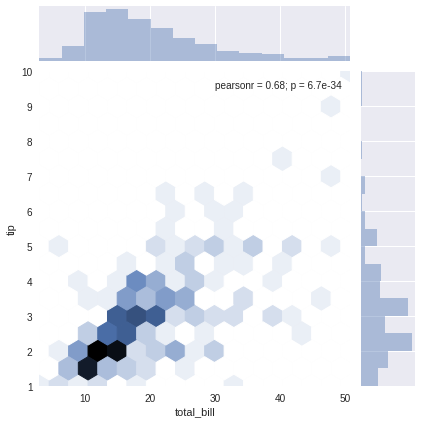

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex' )

/home/casper/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


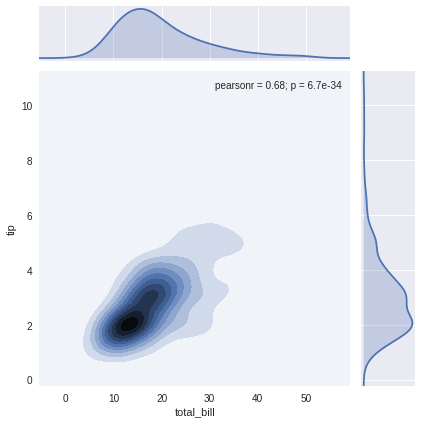

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde' )

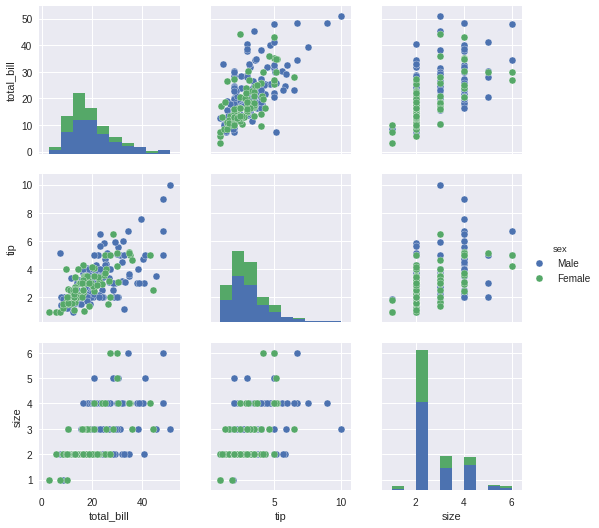

In [10]:
sns.pairplot(tips, hue='sex')

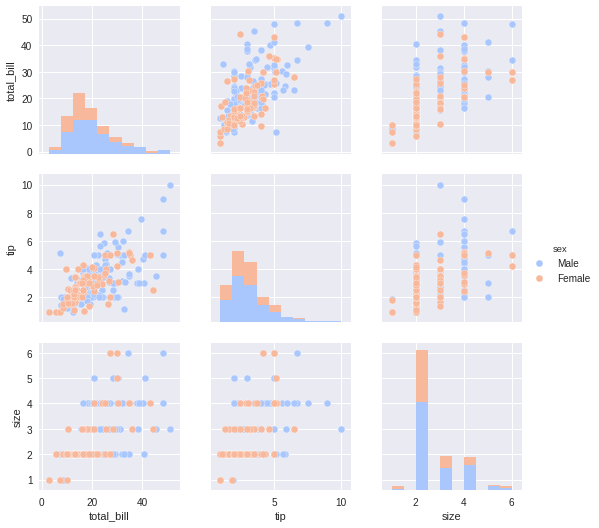

In [11]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

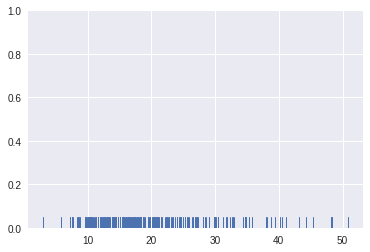

In [12]:
sns.rugplot(tips['total_bill'])

## KDE plot

(0, 1)

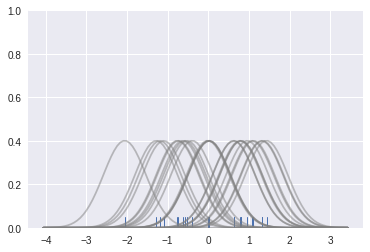

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)


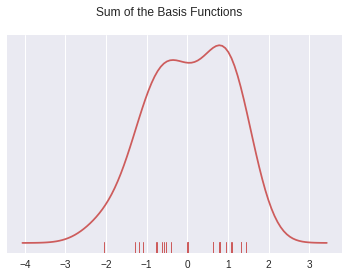

In [14]:
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

## Categorical Data

In [15]:
import numpy as np

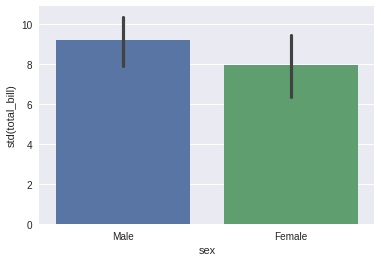

In [16]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

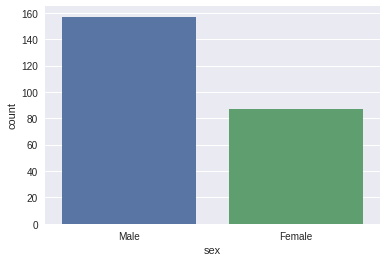

In [17]:
sns.countplot(x='sex',data=tips)

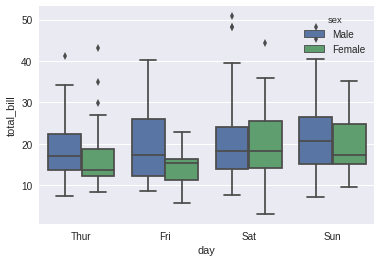

In [18]:
sns.boxplot(x='day',y='total_bill', data=tips, hue='sex')

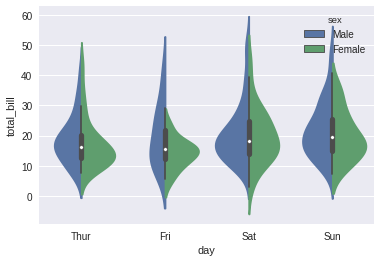

In [19]:
sns.violinplot(x='day',y='total_bill', data=tips, hue='sex', split=True)

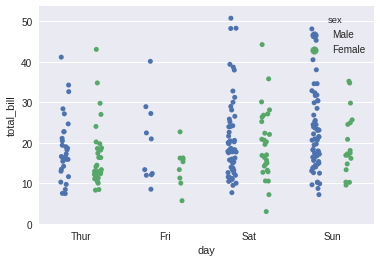

In [20]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True, hue='sex', split=True)

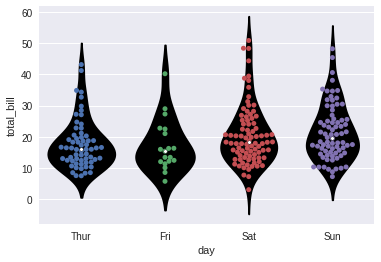

In [21]:
sns.swarmplot(x='day',y='total_bill', data=tips)
sns.violinplot(x='day',y='total_bill', data=tips, color='black')

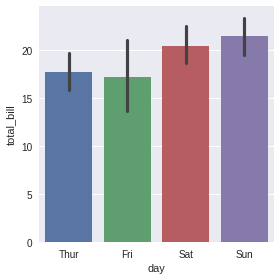

In [22]:
sns.factorplot(x='day',y='total_bill', data=tips, kind='bar')

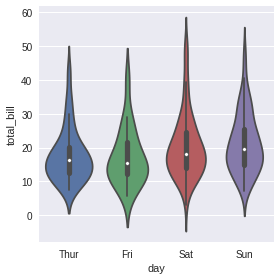

In [23]:
sns.factorplot(x='day',y='total_bill', data=tips, kind='violin')

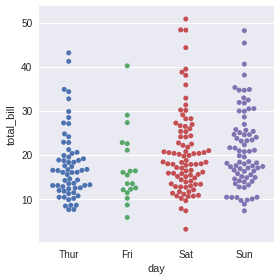

In [24]:
sns.factorplot(x='day',y='total_bill', data=tips, kind='swarm')

## Matrix Plots

In [25]:
flights=sns.load_dataset('flights')

In [26]:
flights.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [27]:
pt = flights.pivot_table(values='passengers', index='month', columns='year')

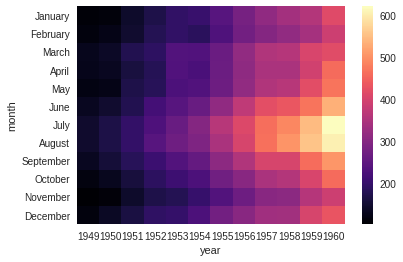

In [28]:
sns.heatmap(pt,cmap='magma')

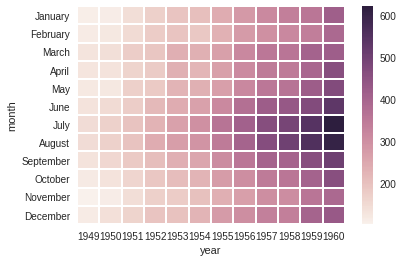

In [29]:
sns.heatmap(pt, linewidths=1)

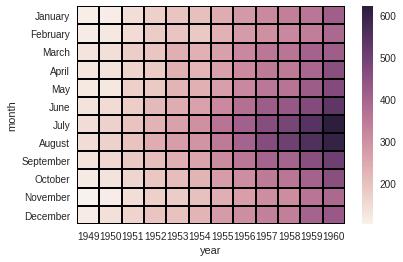

In [30]:
sns.heatmap(pt, linewidths=1, linecolor='black')

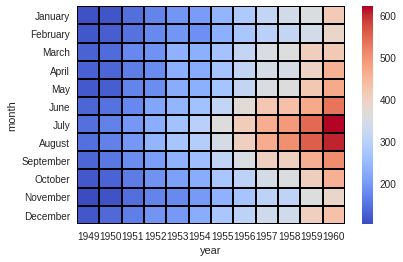

In [31]:
sns.heatmap(pt, linewidths=1, linecolor='black', cmap='coolwarm')

/home/casper/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


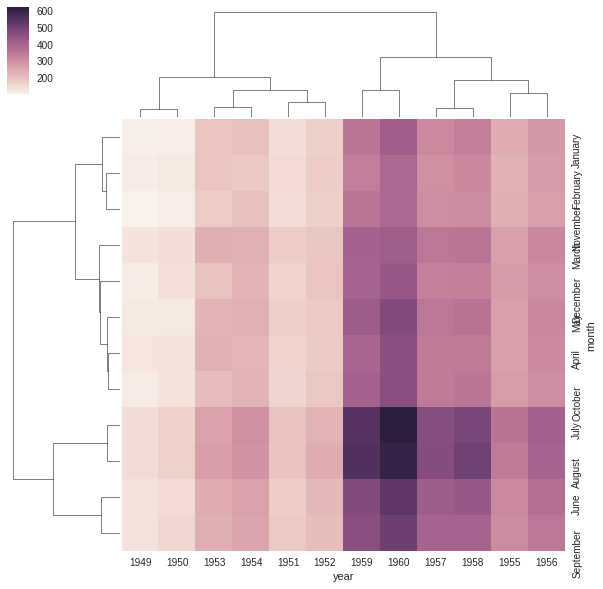

In [32]:
sns.clustermap(pt)

/home/casper/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


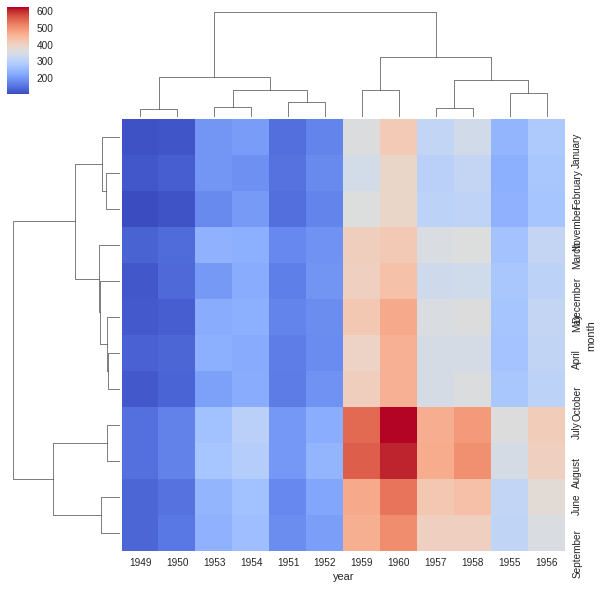

In [33]:
sns.clustermap(pt, cmap='coolwarm')

/home/casper/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


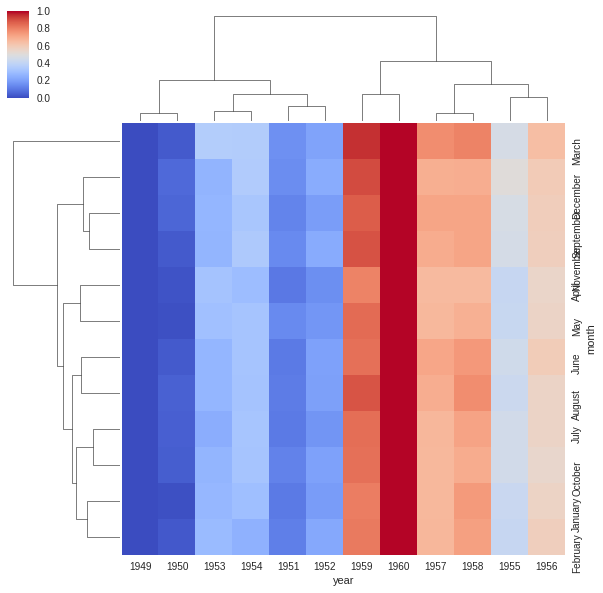

In [34]:
sns.clustermap(pt, cmap='coolwarm', standard_scale=0)

/home/casper/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


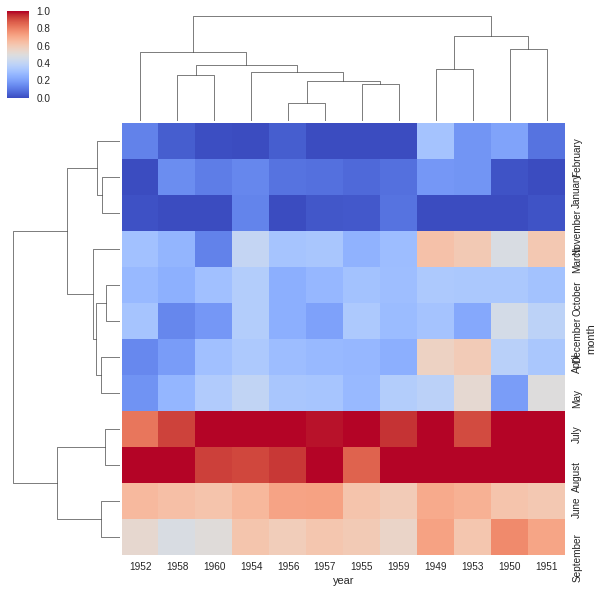

In [35]:
sns.clustermap(pt, cmap='coolwarm', standard_scale=1)

## Regression Plots

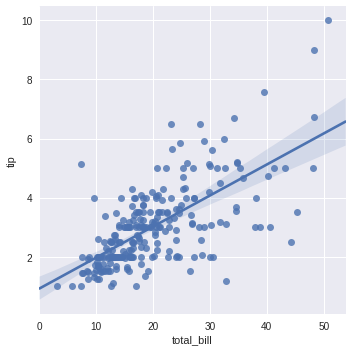

In [36]:
sns.lmplot(x='total_bill',y='tip',data=tips)

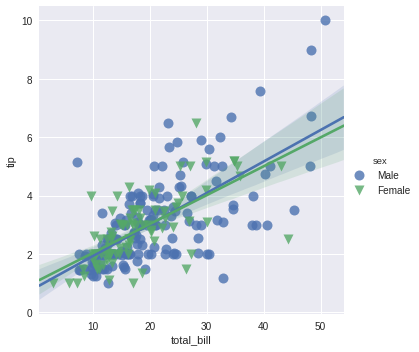

In [37]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', markers=['o','v'], 
           scatter_kws={'s':100})
## scatter_kws argument passes these arguments to matplotlib 'under the hood'

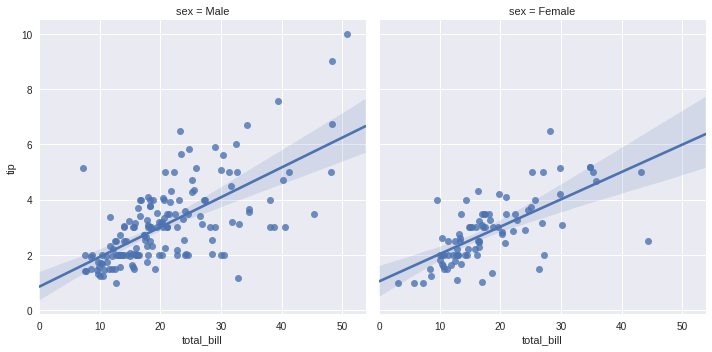

In [38]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex')

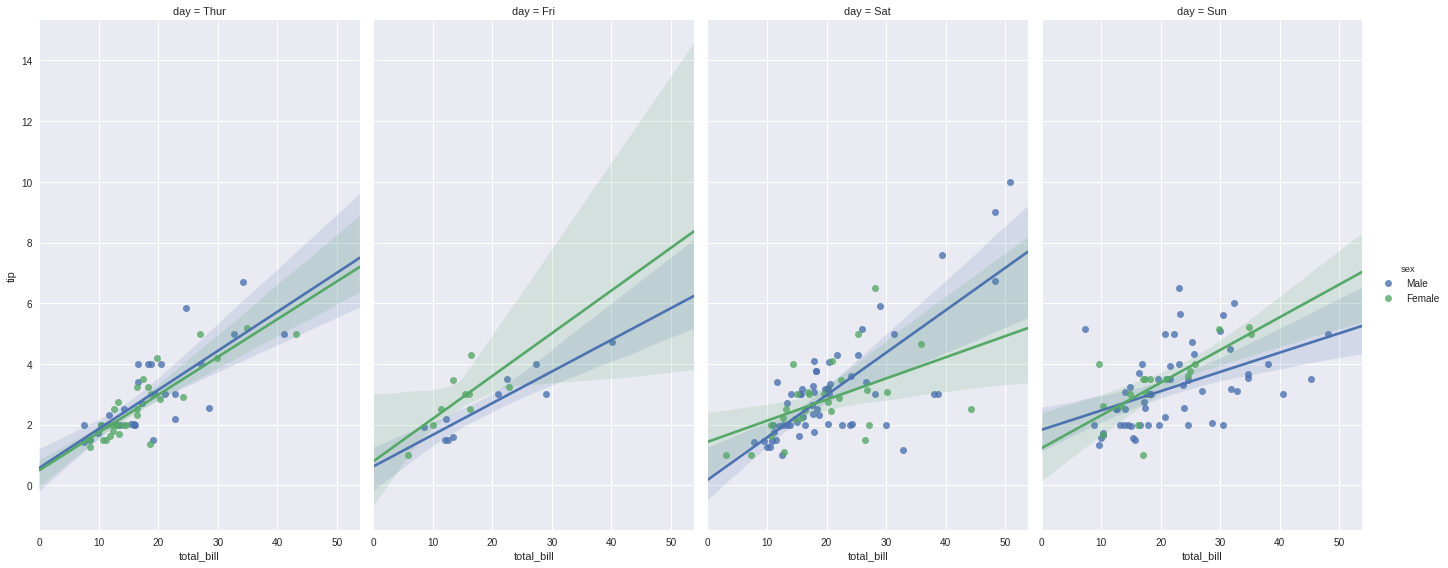

In [39]:
plot = sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', col='day', aspect=0.6, size=8)

In [40]:
plot.savefig('testing save fig')

## Grids in Seaborn

In [42]:
iris = sns.load_dataset('iris')

In [43]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


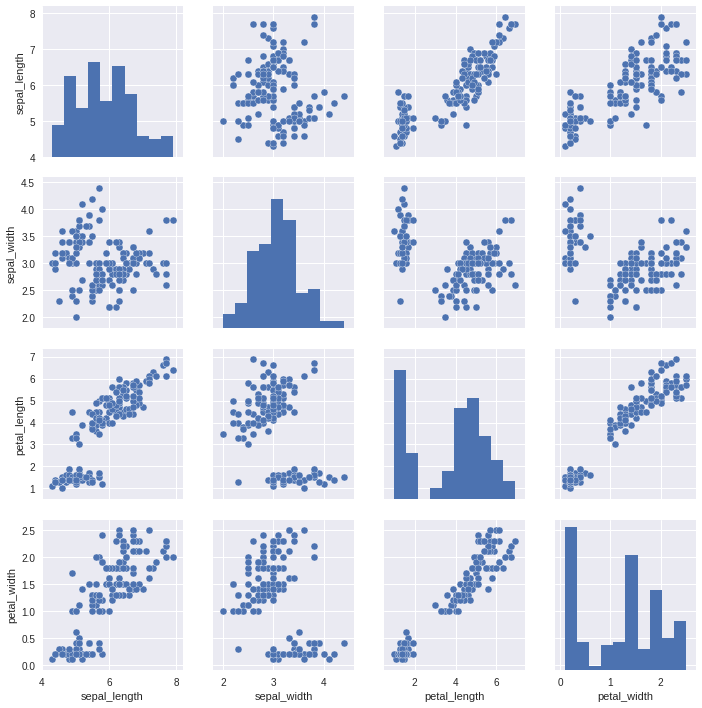

In [46]:
sns.pairplot(iris)

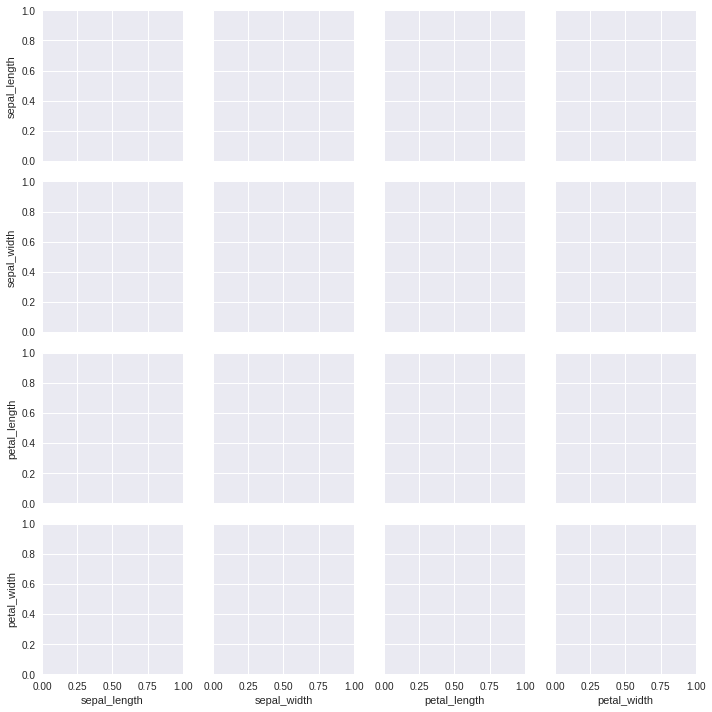

In [47]:
sns.PairGrid(iris)

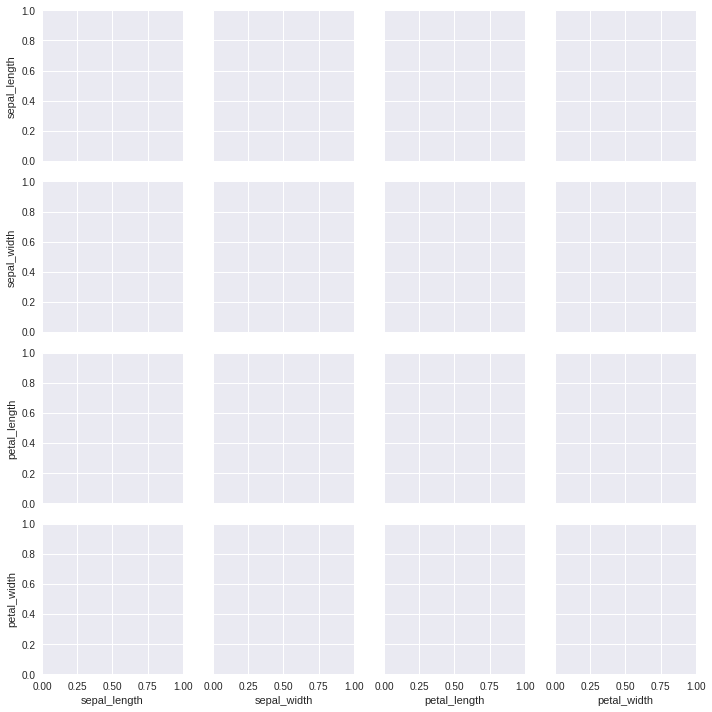

In [49]:
g = sns.PairGrid(iris)

/home/casper/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


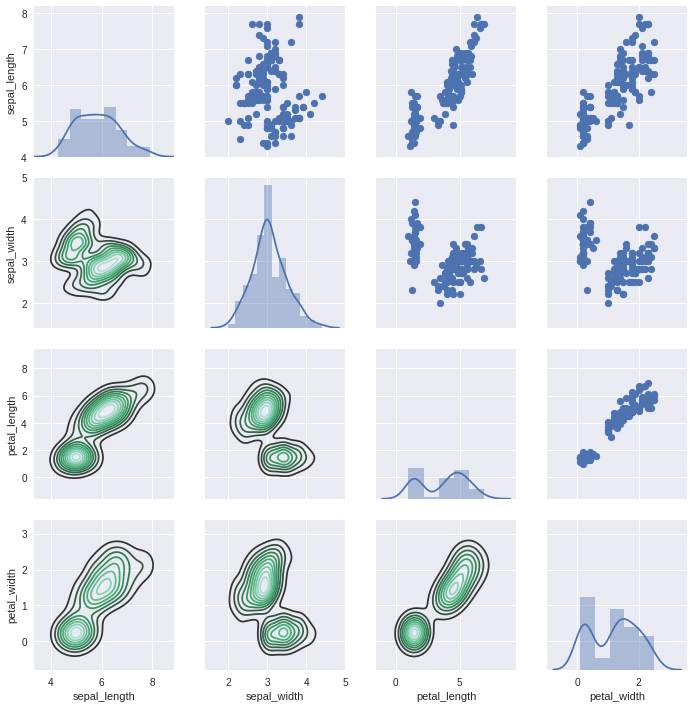

In [57]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)

In [58]:
tips = sns.load_dataset('tips')

/home/casper/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


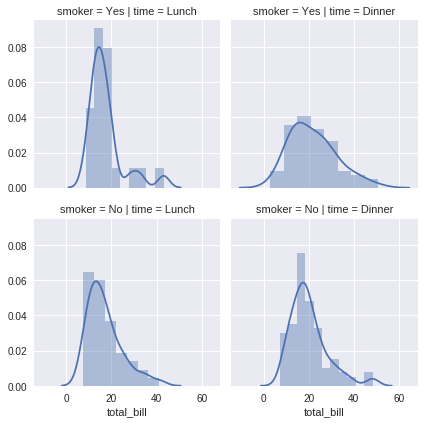

In [66]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(sns.distplot, 'total_bill')

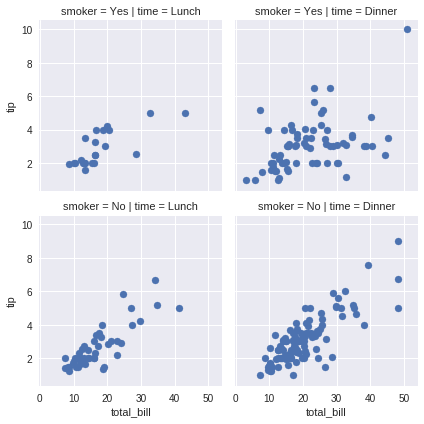

In [71]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter, 'total_bill','tip')

## Style and Color

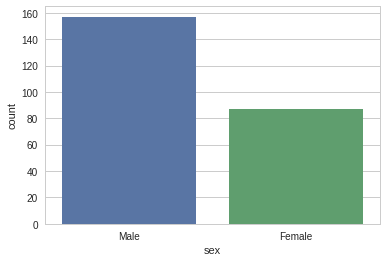

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)

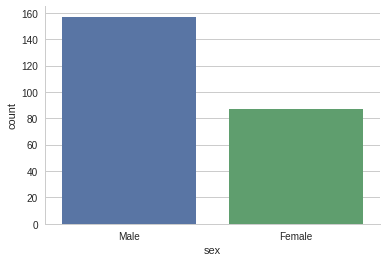

In [79]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)
sns.despine()

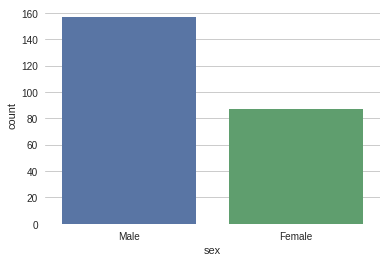

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)
sns.despine(left = True, bottom = True)

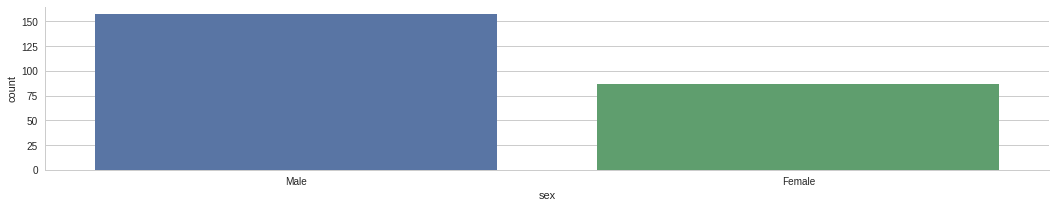

In [84]:
plt.figure(figsize=(18,3))
sns.countplot(x='sex', data=tips)
sns.despine()

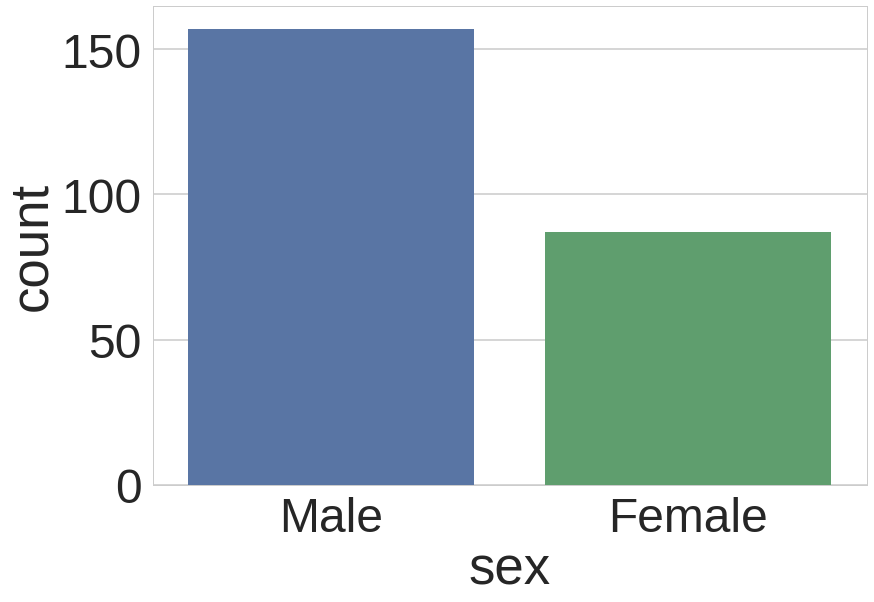

In [90]:
sns.set_context('poster',font_scale=3)
sns.countplot(x='sex', data=tips)

In [91]:
import pandas as pd

In [ ]:
pd.re